In [50]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils  # to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2

In [52]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Loading the Dataset into python & Prepare training data

In [53]:
filenames = os.listdir(r'C:\Users\Abhishek Jaiswal\OneDrive\Desktop\cat dog\Cat_Dog_Classifiyer\train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    print(category)
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog


In [54]:
filenames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.101.jpg',
 'cat.102.jpg',
 'cat.103.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg',
 'cat.107.jpg',
 'cat.108.jpg',
 'cat.109.jpg',
 'cat.11.jpg',
 'cat.110.jpg',
 'cat.111.jpg',
 'cat.112.jpg',
 'cat.113.jpg',
 'cat.114.jpg',
 'cat.115.jpg',
 'cat.116.jpg',
 'cat.117.jpg',
 'cat.118.jpg',
 'cat.119.jpg',
 'cat.12.jpg',
 'cat.120.jpg',
 'cat.121.jpg',
 'cat.122.jpg',
 'cat.123.jpg',
 'cat.124.jpg',
 'cat.125.jpg',
 'cat.126.jpg',
 'cat.127.jpg',
 'cat.128.jpg',
 'cat.129.jpg',
 'cat.13.jpg',
 'cat.130.jpg',
 'cat.131.jpg',
 'cat.132.jpg',
 'cat.133.jpg',
 'cat.134.jpg',
 'cat.135.jpg',
 'cat.136.jpg',
 'cat.137.jpg',
 'cat.138.jpg',
 'cat.139.jpg',
 'cat.14.jpg',
 'cat.140.jpg',
 'cat.141.jpg',
 'cat.142.jpg',
 'cat.143.jpg',
 'cat.144.jpg',
 'cat.145.jpg',
 'cat.146.jpg',
 'cat.147.jpg',
 'cat.148.jpg',
 'cat.149.jpg',
 'cat.15.jpg',
 'cat.150.jpg',
 'cat.151.jpg',
 'cat.152.jpg',
 'cat.153.jpg',
 'cat.154.jpg',
 '

In [55]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


<Axes: xlabel='category'>

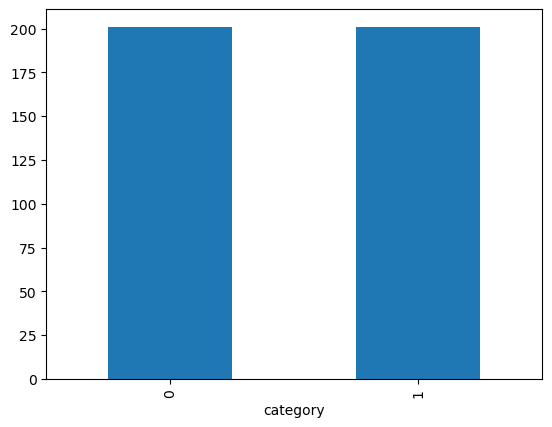

In [56]:
df['category'].value_counts().plot.bar()

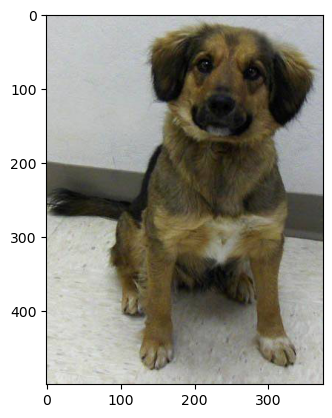

In [57]:
#Check sample image
sample = random.choice(filenames)

image = load_img(r'C:\Users\Abhishek Jaiswal\OneDrive\Desktop\cat dog\Cat_Dog_Classifiyer\train\\' + sample)
plt.imshow(image)

# Defining the convolutional neural network architecture  

In [58]:
# Creating our model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

C:\Users\Abhishek Jaiswal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [59]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [60]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


In [61]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

# Training the data by to the above CNN model

In [62]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df

,filename,category
18,cat.114.jpg,cat
203,dog.10.jpg,dog
351,dog.53.jpg,dog
275,dog.165.jpg,dog
63,cat.155.jpg,cat
...,...,...
71,cat.162.jpg,cat
106,cat.194.jpg,cat
270,dog.160.jpg,dog
348,dog.50.jpg,dog


In [63]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [64]:
train_df

,filename,category
0,cat.114.jpg,cat
1,dog.10.jpg,dog
2,dog.53.jpg,dog
3,dog.165.jpg,dog
4,cat.155.jpg,cat
...,...,...
316,cat.162.jpg,cat
317,cat.194.jpg,cat
318,dog.160.jpg,dog
319,dog.50.jpg,dog


In [65]:
train_df.shape

(321, 2)

In [66]:
validate_df.shape

(81, 2)

<Axes: xlabel='category'>

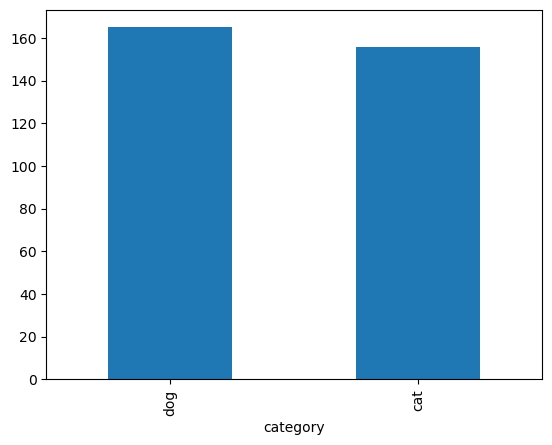

In [67]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

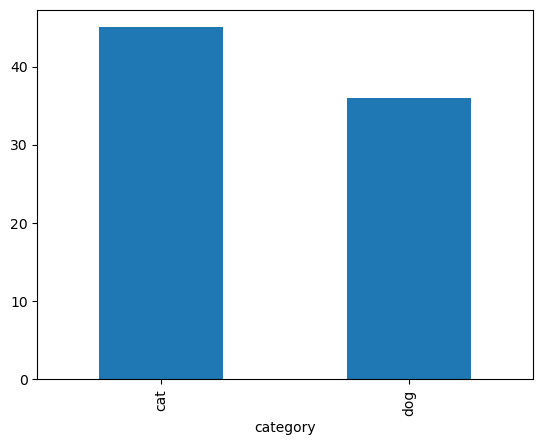

In [68]:
validate_df['category'].value_counts().plot.bar()

In [69]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [70]:
#training generator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "C:\\Users\\Abhishek Jaiswal\\OneDrive\\Desktop\\cat dog\\Cat_Dog_Classifiyer\\train\\",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 321 validated image filenames belonging to 2 classes.


In [71]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "C:\\Users\\Abhishek Jaiswal\\OneDrive\\Desktop\\cat dog\\Cat_Dog_Classifiyer\\train\\",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 81 validated image filenames belonging to 2 classes.


In [72]:
 #fit model
    
epochs =  3 if FAST_RUN else 50

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = total_validate//batch_size,
                    steps_per_epoch = total_train//batch_size,
                    callbacks = callbacks)

model.save("that_model.h5")

Epoch 1/3


C:\Users\Abhishek Jaiswal\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 728ms/step - accuracy: 0.4877 - loss: 2.1217 - val_accuracy: 0.4667 - val_loss: 1.4418 - learning_rate: 0.0010
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7333 - loss: 0.8622 - val_accuracy: 0.1667 - val_loss: 1.7785 - learning_rate: 0.0010
Epoch 3/3


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 698ms/step - accuracy: 0.6381 - loss: 1.0977 - val_accuracy: 0.4800 - val_loss: 3.2460 - learning_rate: 0.0010


<function matplotlib.pyplot.show(close=None, block=None)>

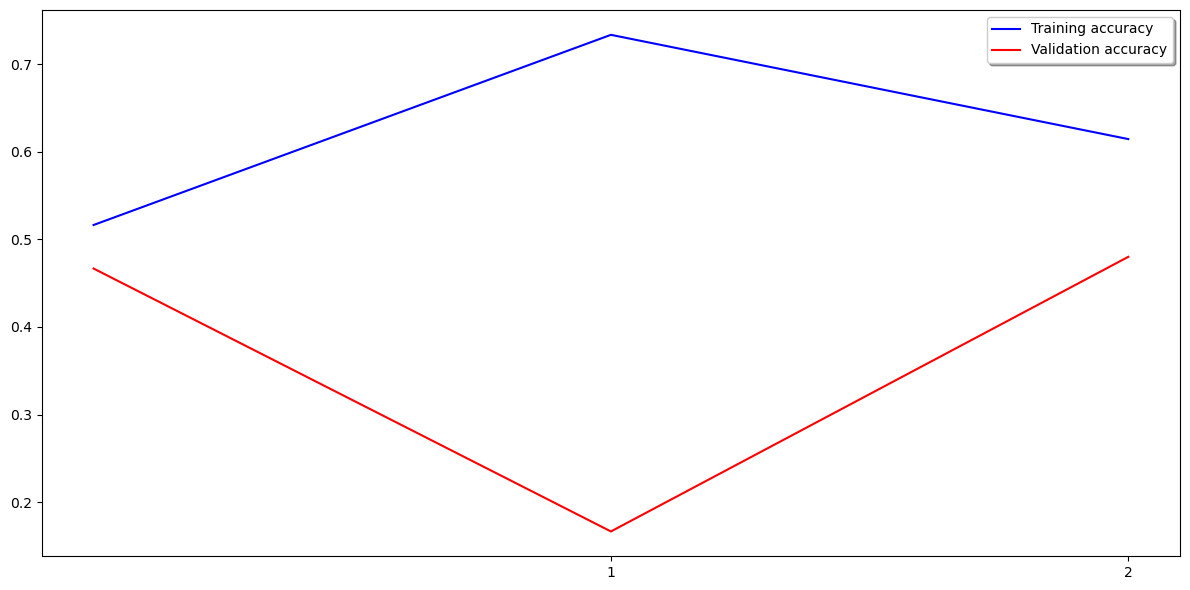

In [73]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,6))

ax1.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax1.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax1.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show

# Making the predictions for a single test image 

In [83]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image
img_path =r"C:\Users\Abhishek Jaiswal\OneDrive\Desktop\cat dog\Cat_Dog_Classifiyer\train\cat.3.jpg"   # Update with your image path
img = image.load_img(img_path, target_size=(224, 224))  # MobileNetV2 requires input shape (224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make prediction
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print top 3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print("Prediction {}: {} (Confidence: {:.2f}%)".format(i+1, label, score*100))


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction 1: Siamese_cat (Confidence: 14.29%)
Prediction 2: Egyptian_cat (Confidence: 6.32%)
Prediction 3: wallaby (Confidence: 4.56%)
